## Лабораторная работа №1 | Вариант 7

Выполнил: 

### 1. Numpy

In [2]:
import numpy as np

1. What is the result of the following expression?

```python
0 * np.nan # nan
np.nan == np.nan # False
np.inf > np.nan # False
np.nan - np.nan # nan
np.nan in set([np.nan]) # True
0.3 == 3 * 0.1 # False
```

In [3]:
print(0 * np.nan)
print(np.nan == np.nan)
print(np.inf > np.nan)
print(np.nan - np.nan)
print(np.nan in set([np.nan]))
print(0.3 == 3 * 0.1)

nan
False
False
nan
True
False


2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [18]:
matrix = np.zeros((5, 5))
for i in range(0, 5):
    for j in range(i): 
        matrix[i, j] = j + 1

print(matrix)

[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [1. 2. 3. 0. 0.]
 [1. 2. 3. 4. 0.]]


3. Создайте матрицу 8х8 и заполните ее паттерном шахматной доски

In [30]:
print(np.indices((8, 8)).sum(axis=0) % 2)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


4. Умножте матрицу 5х3 и 3х2 (матричное умножение)

In [33]:
print(np.matmul(np.indices((5, 3)).sum(axis=0), np.indices((3, 2)).sum(axis=0)))

[[ 5  8]
 [ 8 14]
 [11 20]
 [14 26]
 [17 32]]


5. Как получить все даты, соответствующие июлю 2016 года?

In [36]:
print(np.arange(np.datetime64('2016-07-01'), np.datetime64('2016-08-01')))

['2016-07-01' '2016-07-02' '2016-07-03' '2016-07-04' '2016-07-05'
 '2016-07-06' '2016-07-07' '2016-07-08' '2016-07-09' '2016-07-10'
 '2016-07-11' '2016-07-12' '2016-07-13' '2016-07-14' '2016-07-15'
 '2016-07-16' '2016-07-17' '2016-07-18' '2016-07-19' '2016-07-20'
 '2016-07-21' '2016-07-22' '2016-07-23' '2016-07-24' '2016-07-25'
 '2016-07-26' '2016-07-27' '2016-07-28' '2016-07-29' '2016-07-30'
 '2016-07-31']


6. Создайте матрицу размером 5х5 со случайными значениями строк в диапазоне от 0 до 4

In [37]:
print(np.random.randint(0, 5, size=(5, 5)))

[[2 0 2 1 3]
 [0 0 1 2 3]
 [2 3 0 0 0]
 [0 1 1 2 2]
 [0 1 2 1 1]]


7. Создайте вектор размером 10 со значениями в диапазоне от $(0, 1)$

In [38]:
print(np.random.uniform(0, 1, 10))

[0.26828593 0.7277473  0.91410861 0.77748145 0.6510061  0.70869692
 0.35929708 0.26426153 0.04689044 0.15868805]


8. Выведите минимальное и максимальное представимое значение для каждого скалярного типа numpy

In [53]:
from operator import attrgetter

def print_type_constraints(type, is_float = False):
    min, max = attrgetter('min', 'max')(np.iinfo(type) if not is_float else np.finfo(type))
    print(f"{type.__name__}: from {min} to {max}")

int_types = [np.int8, np.int16, np.int32, np.int64]
uint_types = [np.uint8, np.uint16, np.uint32, np.uint64]
float_types = [np.float16, np.float32, np.float64]

for type_group in [int_types, uint_types]:
    for type in type_group:
        print_type_constraints(type)
    print("\n")

for type in float_types:
    print_type_constraints(type, True)

int8: from -128 to 127
int16: from -32768 to 32767
int32: from -2147483648 to 2147483647
int64: from -9223372036854775808 to 9223372036854775807


uint8: from 0 to 255
uint16: from 0 to 65535
uint32: from 0 to 4294967295
uint64: from 0 to 18446744073709551615


float16: from -65504.0 to 65504.0
float32: from -3.4028234663852886e+38 to 3.4028234663852886e+38
float64: from -1.7976931348623157e+308 to 1.7976931348623157e+308


9. Как отсортировать массив по n-му столбцу?

In [56]:
n = 2
matrix = np.random.randint(0, 5, size=(5, 5))
print(matrix[matrix[:, n].argsort()])

[3 0 1 2 4]


10. Как определить, есть ли в данном двумерном массиве пустые столбцы?

In [68]:
matrix = np.zeros((5, 5))
matrix[:, ::2] = 1
# .any === truthy boolean convertions
print((~matrix.any(axis=0)).any())

matrix[::2, :] = 1
print((~matrix.any(axis=0)).any())

True
False


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных для изучения зависимости различных параметров тела человека.

Файл: `data.csv`

```
Height (cm) - рост человека в сантиметрах
Weight (kg) - вес человека в килограммах
Blood Pressure (s/d) - кровяное давление(systolic/diastolic) в mmHg.
Cholesterol Level (mg/dL) - уровень холестерина milligrams per deciliter.
BMI - Body Mass Index, рассчитывается по весу и росту.
Blood Glucose Level (mg/dL) - уровень глюкозы в крови milligrams per deciliter.
Bone Density (g/cm²) - плотность костной массы grams per square centimeter.
Vision Sharpness - четкость зрения от 0 (полностью размыто) до 100 (идеально).
Hearing Ability (dB) - способность воспринимать звуки в dB.
Physical Activity Level - уровень физической активности 'Low', 'Moderate', или 'High'.
Smoking Status - статус курильщика 'Never', 'Former', и 'Current'.
Alcohol Consumption - частота принятия алкоголя.
Diet - тип диеты. Категоризован на 'Balanced', 'High Protein', 'Low Carb', и т.п.
Chronic Diseases - наличие хронических заболеваний (e.g., diabetes, hypertension).
Medication Use - использование медикаментов.
Family History - наличие в семейном анамнезе возрастных заболеваний.
Cognitive Function - самооценка когнитивных функций по шкале от 0 (плохая) до 100 (отличная).
Mental Health Status - самооценка состояния психического здоровья по шкале от 0 (плохое) до 100 (отличное).
Sleep Patterns - среднее кол-во сна за ночь.
Stress Levels - самооценка уровня стресса по шкале от 0 (низкий) до 100 (высокий).
Pollution Exposure - воздействие загрязнения, измеряемое в произвольных единицах измерения.
Sun Exposure - среднее время пребывания на солнце в часах в неделю.
Education Level - уровень образования.
Income Level - доход в USD.
```

In [3]:
import pandas as pd
pd.set_option("display.precision", 2)

In [4]:
# Load dataset here
data = pd.read_csv("./data.csv")
data.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.15,86.19,151/109,259.47,29.42,157.65,0.13,0.20,58.79,...,NaN,44.06,Good,Insomnia,2.80,5.14,7.11,NaN,Medium,89
1,Male,172.95,79.64,134/112,263.63,26.63,118.51,0.63,0.27,54.64,...,Heart Disease,45.31,Good,Normal,9.34,7.27,3.92,Undergraduate,Medium,77
2,Female,155.95,49.17,160/101,207.85,20.22,143.59,0.47,0.25,54.56,...,Hypertension,56.25,Poor,Insomnia,9.23,8.50,5.39,NaN,Medium,70
3,Female,169.08,56.02,133/94,253.28,19.60,137.45,1.18,0.51,79.72,...,Hypertension,55.20,Poor,Insomnia,4.69,7.56,2.75,NaN,Low,52
4,Female,163.76,73.97,170/106,236.12,27.58,145.33,0.43,0.31,52.48,...,NaN,53.02,Good,Normal,4.04,9.43,3.88,Undergraduate,High,79


1. Какой средний вес людей представленных в наборе данных?

In [74]:
data["Weight (kg)"].mean()

np.float64(72.53726013905388)

2. Сбалансировано ли соотношение мужчин и женщин в наборе данных?

In [80]:
n = data.shape[0]

men = data[data["Gender"] == "Male"].shape[0]
women = data[data["Gender"] == "Female"].shape[0]

print(f"Men - {(men / n * 100):.2f}%\nWomen - {(women / n * 100):.2f}%\n")
print(f"Соотношение мужчин и женщин: 1:{(men / women):.2f} => оно{" не" if (men / women) > 1.5 else ""} сбалансировано")

Men - 49.63%
Women - 50.37%

Соотношение мужчин и женщин: 1:0.99 => оно сбалансировано


3. Правда ли, что люди с высоким уровнем стресса имеют более высокое кровяное давление, чем те, кто не подвержен стрессу

In [116]:
mean_stress = data["Stress Levels"].mean()
high_stress = data[data["Stress Levels"] > mean_stress]
low_stress = data[data["Stress Levels"] <= mean_stress]

are_pressure_and_stress_correlated = \
  (low_stress["Blood Pressure (s/d)"]
   .apply(lambda x: x.split("/"))) \
   .apply(lambda x: (int(x[0]) + int(x[1])) / 2) \
   .mean() \
  < \
  (high_stress["Blood Pressure (s/d)"] \
   .apply(lambda x: x.split("/"))) \
   .apply(lambda x: (int(x[0]) + int(x[1])) / 2) \
   .mean()

print("Yes" if are_pressure_and_stress_correlated else "No")

Yes


4. Правда ли, что уровень холестерина у мужчин и женщин отличается?

In [122]:
men_cholestorol = data[data["Gender"] == "Male"]["Cholesterol Level (mg/dL)"].mean()
women_cholestorol = data[data["Gender"] == "Female"]["Cholesterol Level (mg/dL)"].mean()

print("Yes" if abs(men_cholestorol - women_cholestorol) > 1.5 else "No")

No


5. Правда ли, что с возрастом женщины имеют свойство оценивать свои когнитивные способности хуже, чем в юности (порог юности - 30 лет, женщина в возрасте - 60 лет+)

In [123]:
women = data[data["Gender"] == "Female"]
young_cognitive = women[women["Age (years)"] < 30]["Cognitive Function"].mean()
old_cognitive = women[women["Age (years)"] >= 60]["Cognitive Function"].mean()

print("Yes" if old_cognitive - young_cognitive < 0 else "No")

Yes


6. Влияет ли физическая активность на вес в возрасте более 50 лет?

In [124]:
old = data[data["Age (years)"] > 50]
low_activity_weight = old[old["Physical Activity Level"] == "Low"]["Weight (kg)"].mean()
med_activity_weight = old[old["Physical Activity Level"] == "Moderate"]["Weight (kg)"].mean()
high_activity_weight = old[old["Physical Activity Level"] == "High"]["Weight (kg)"].mean()

print(f"low: {low_activity_weight}\nmed: {med_activity_weight}\nhigh: {high_activity_weight}")


low: 74.36552503757412
med: 72.07604748397078
high: 70.42802647863721


7. Сравните минимальный вес мужчин с высоким и низким заработком

In [125]:
low_income = data[data["Income Level"] == "Low"]["Weight (kg)"].min()
high_income = data[data["Income Level"] == "High"]["Weight (kg)"].min()

print(f"men with low income weigh {\
  'more than' if low_income > high_income else \
  'less than' if low_income == high_income else 'the same as'\
} men with high income")

men with low income weigh more than men with high income


8. Правда ли, что у людей с индексом массы тела больше 75го перцентиля встречаются хронические заболевания чаще, чем у людей с индесом массы тела в переделах от 30 до 60 перцентиля?

In [154]:
BMI_30 = data["BMI"].quantile(0.3)
BMI_60 = data["BMI"].quantile(0.6)
BMI_75= data["BMI"].quantile(0.75)

people_30_60 = data[(data["BMI"] >= BMI_30) & (data["BMI"] <= BMI_60)]["Chronic Diseases"]
diseases_30_60 = people_30_60.dropna().shape[0] / people_30_60.shape[0]

people_75_100 = data[data["BMI"] > BMI_75]["Chronic Diseases"]
diseases_75_100 = people_75_100.dropna().shape[0] / people_75_100.shape[0]

print("yes" if diseases_75_100 > diseases_30_60 else "no")

yes


9. Правда ли, что люди с высоким уровнем дохода имеют больший уровень физической активности, чем люди с низким доходом

In [170]:
activity_data = data.groupby(["Physical Activity Level", "Income Level"]).size().unstack().fillna(0)
total_low_income = activity_data['Low'].sum()
total_high_income = activity_data['High'].sum()

print(
  'Yes' 
  if activity_data['High']['High'] / total_high_income >
     activity_data['Low']['High'] / total_low_income
  else 'No'
)


No


10. Какая доля мужчин с высокой частотой пребывания на солнце имеет высокий заработок?

In [179]:
men = data[data['Gender'] == "Male"]
high_sun_exposure = men[men["Sun Exposure"] > men["Sun Exposure"].mean()]
high_income_share = high_sun_exposure[high_sun_exposure["Income Level"] == "High"].shape[0] / high_sun_exposure.shape[0]

print(high_income_share)

0.30213903743315507


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Визуализируйте частоту встречаемых хронических заболеваний

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

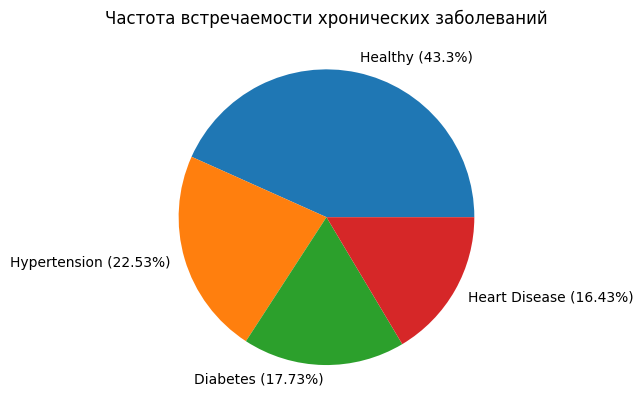

In [58]:
chronic_diseases = list(
  zip(
    data["Chronic Diseases"].fillna("Healthy").value_counts(dropna=False).index,
    round(data["Chronic Diseases"].value_counts(dropna=False, normalize=True) * 100, 2).values
  )
)

plt.pie(
  data["Chronic Diseases"].fillna("Healthy").value_counts(),
  labels=[i[0] + f" ({i[1]}%)" for i in chronic_diseases],
)

plt.title("Частота встречаемости хронических заболеваний")
plt.show()

2. Как связана оценка собственных когнитивных функций с уровнем стресса?

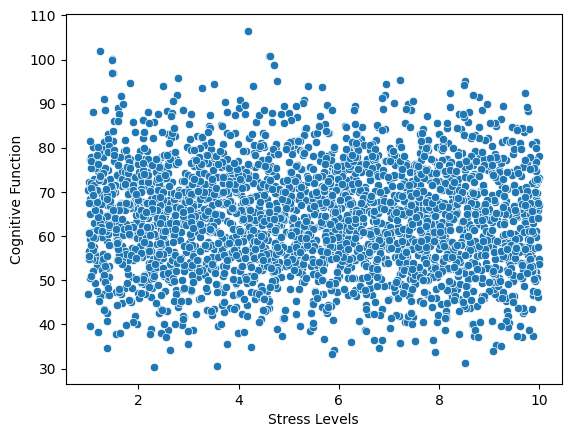

In [67]:
plt.figure()
sns.scatterplot(data=data, x="Stress Levels", y="Cognitive Function")

plt.show()

3. Визуализируйте как зависит вес от роста человека

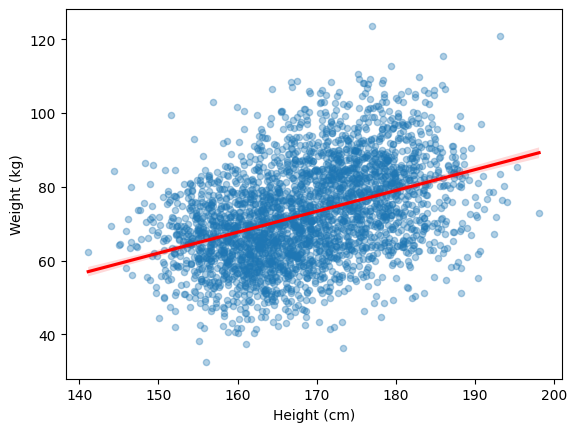

In [79]:
plt.figure()

sns.regplot(
  data=data,
  x="Height (cm)", y="Weight (kg)",
  scatter_kws={"s": 20, "alpha": 0.35},
  line_kws={"color": "red"}
)

plt.show()

4. Постройте box plot отображающий распределение уровня стресса у людей с различным уровнем дохода

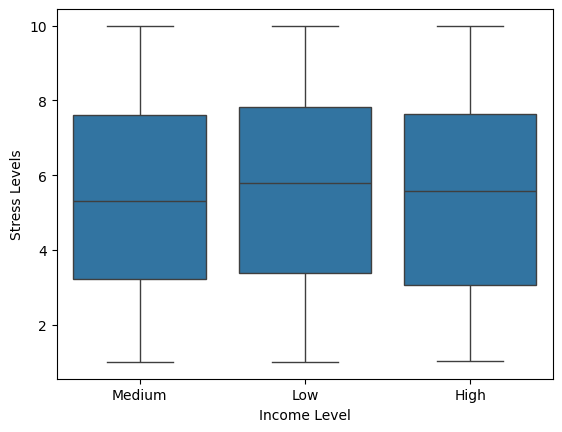

In [103]:
plt.figure()

sns.boxplot(data=data, x="Income Level", y="Stress Levels")

plt.show()

5. Постройте круговую диаграмму отображающую как ментальное здоровье связано с паттернами сна

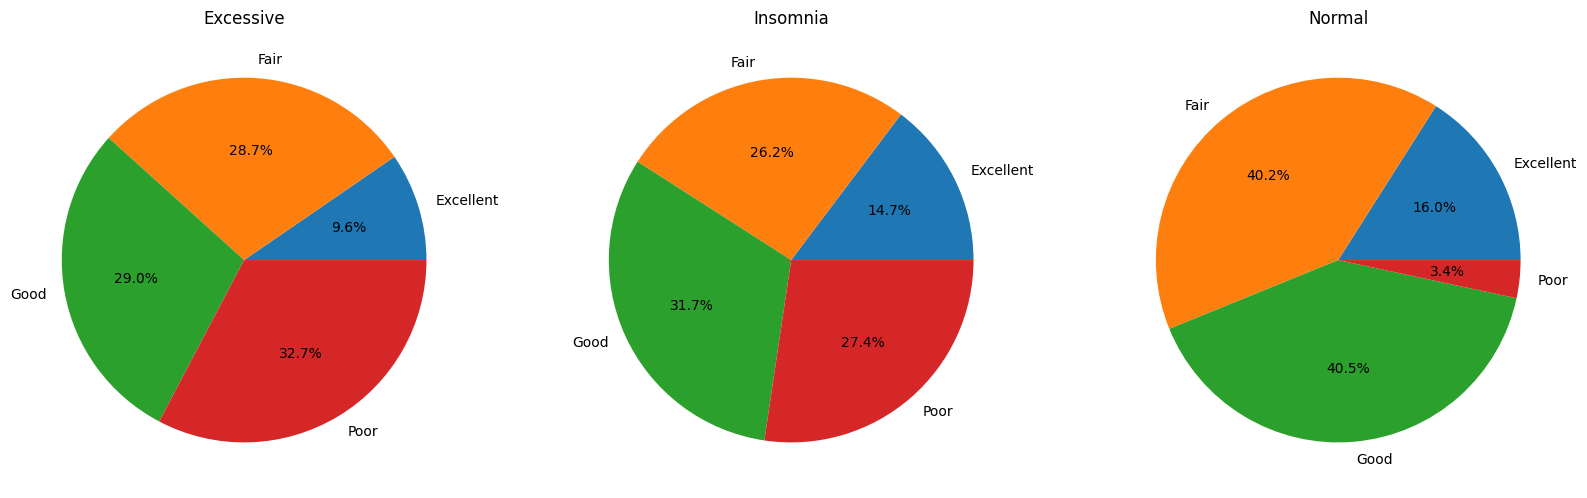

In [121]:
wealth_to_sleep_pattern = data.groupby(["Mental Health Status", "Sleep Patterns"]).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, len(wealth_to_sleep_pattern.columns), figsize=(20, 10))

for i, ax in enumerate(axes):
    wealth_to_sleep_pattern.iloc[:, i].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title(wealth_to_sleep_pattern.columns[i])
    ax.get_yaxis().set_visible(False)

plt.show()

6. Имеет ли связь зрение и способность слышать звуки на высоких частотах? Ответьте на вопрос - какая зависимость между ними и предположите почему зависимость именно такая?

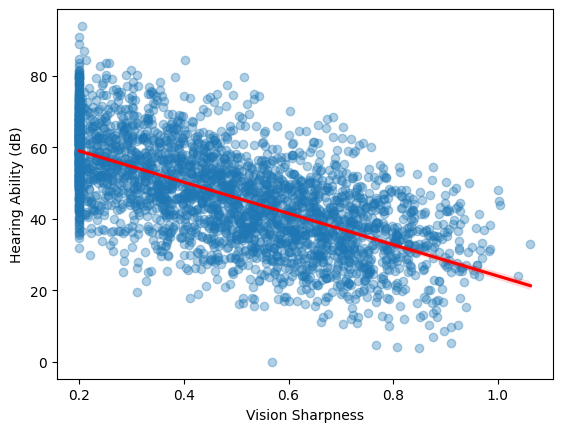

In [99]:
plt.figure()

sns.regplot(
  data=data,
  x="Vision Sharpness",
  y="Hearing Ability (dB)",
  scatter_kws={"alpha": 0.35},
  line_kws={"color": "red"}
)

plt.show()

7. Красиво визуализируйте как связаны между собой уровень дохода, когнитивные способности и уровень стресса*

\* Задание на доп. балл